<a href="https://colab.research.google.com/github/anyesha/320final/blob/main/CMSC320_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breaking down the Grammy Award for *Record of the Year* -  An Analysis**

Final 320 Project

Anyesha Majumdar 

Sriya Srikanth

Since 1959, the the National Academy of Recording Arts and Sciences has been awarding the Grammy Award for Record of the Year. As the Academy describes it, "[The Record Of The Year](https://www.grammy.com/grammys/news/whats-difference-grammy-record-year-vs-song-year) GRAMMY goes to the artist(s), producer(s), and engineer(s) involved in crafting the specific recording." 

Since the late 1950's, the evolution of music is marked by overarching shifts in popular culture and the uprising of technology. "Nel Blue Dipinto Di Blue," an Italian ballad by  Domenico Modugno and the Record of the Year winner in 1959, is a stark contrast from the electropop stylings of Billie Eilish's 2020 award winner, "Bad Guy."

The quality of music and the validity of such awards are topics usually up for debate. 

Let's take a look at  all the nominees for the Grammy Award for Record of the Year from 1959-2020 and break down what makes some of them winners. 

# **Data Collection**

In order to analyze the characteristics of Record of the Year nominess, we utilized Spotipy, a lightweight Python library for the Spotify Web API. 

We created multiple spotify playlists, one with the winners since 1959s and three with the nominations for record of the year that did not ultimately win. We split the other nominees into three playlists as the Spotify API only allows for 100 tracks per playlist. We will be using the music in these playlists to ultimately predict what the 2020 Record of the Year will be. 

Here, we import necessary libraries and create a function for getting the track ids for every song on our two playlists. The track IDs are important for identifying the songs in the playlist, and eventually identifying the unique characteristics of the songs. 

In [ ]:
!pip install spotipy 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

client_id = 'c7a5a47b69634aa2ae2f6896130ba420'
client_secret = 'e3086e5eeeed47109e56fa94b10c57b8'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

#Obtain Data from Grammy Winners playlist
grammy_winners = getTrackIDs('205ezqssuga60f3pzaur0s03w', '76alfO7c0UJss4VusPW9ka')

#Obtain Data from other Grammy nominees playlist(had to split into 3 playlists because it can get a max of 100 ids)
grammy_losers1 = getTrackIDs('205ezqssuga60f3pzaur0s03w', '544qU0dEujOATgZoqqUPd2')
grammy_losers2 = getTrackIDs('205ezqssuga60f3pzaur0s03w', '3uPPtJjqNXN6CVs5gerGdC')
grammy_losers3 = getTrackIDs('205ezqssuga60f3pzaur0s03w', '6AyowbDnvoDOBtXd4NrrsK')

#Combining 3 playlist tracks for Final Grammy Losers Playlist
grammy_losers = grammy_losers1 + grammy_losers2 + grammy_losers3



Here, we create a function that takes a track ID and returns an array of all of its audio features. The Spotify API offers an *Audio Features* Object that stores music characteristics such as energy and tempo, in a quantitative format. We then apply this function on our arrays of track IDs to create Pandas Dataframes of the songs from the winners and losers playlists with columns for their different features. 

In [ ]:
def getAudioFeatures(trackID):
    meta = sp.track(trackID)
    audio_features = sp.audio_features(trackID)

    # Metadata for tracks
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
   

    # Audio Features provided by Spotify API
    acousticness = audio_features[0]['acousticness']
    danceability = audio_features[0]['danceability']
    energy = audio_features[0]['energy']
    instrumentalness = audio_features[0]['instrumentalness']
    liveness = audio_features[0]['liveness']
    loudness = audio_features[0]['loudness']
    speechiness = audio_features[0]['speechiness']
    tempo = audio_features[0]['tempo']
    time_signature = audio_features[0]['time_signature']
    trackID = audio_features[0]['id']

    track = [name, album, artist, release_date, length, popularity, 
        acousticness, danceability, energy, instrumentalness, liveness,
        loudness, speechiness, tempo, time_signature, trackID]
    
    return track


Utilizing our Winners playlist and our Spotify API, we can create a dataframe to house each winning tracks' audio features

In [ ]:
#Winners! 

#Consolidate list of Grammy Winners from playlist
winners = []
for i in range(len(grammy_winners)):
    track = getAudioFeatures(grammy_winners[i]) #Get Audio Features for each track in playlist
    winners.append(track)

# Create dataframe for Record of the Year winners
roy_winners = pd.DataFrame(
    winners,
    columns=[ 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'trackID'])

roy_winners['winner'] = 1 #Binary Variable identifies if a track is a winner or loser
roy_winners.head()


,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,trackID,winner
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,55,0.982,0.547,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,5zyrEv4F3FaLECI8TOKpFM,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,63,0.760,0.549,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,3E5ndyOfO6vFDEIE42HA8o,1
2,"The Theme from ""A Summer Place""",16 Most Requested Songs,Percy Faith & His Orchestra,1989-06-13,142693,56,0.591,0.326,0.3260,0.918000,0.494,-15.144,0.0297,186.232,3,6zwvB879PJSpTyFcg2wwnL,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,41,0.966,0.235,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3,4BjVSvKAfQA4CncucM2Aa9,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,63,0.955,0.313,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4,1bYItjcPRtxZs6Ir71O5RB,1


Utilizing our "Losers" playlist and our Spotify API, we can create a dataframe to house each losing tracks' audio features

In [ ]:
#Other Nominees!

#Consolidate list of Grammy Losers from playlist
losers = []
for i in range(len(grammy_losers)):
    track = getAudioFeatures(grammy_losers[i]) #Get Audio Features for each track in playlist
    losers.append(track)


# Create dataframe for Record of the Year losers
roy_losers = pd.DataFrame(
    losers,
    columns=[
        'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','time_signature', 'trackID'])

roy_losers['winner'] = 0 #Binary Variable identifies if a track is a winner or loser
roy_losers.head()


,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,trackID,winner
0,Catch a Falling Star (with Mitchell Ayres and ...,It's Impossible,Perry Como,1987-10-03,148493,42,0.864,0.628,0.172,0.000000,0.113,-17.816,0.0600,118.895,3,38YMdelhj62vJ6d5a0wxMQ,0
1,The Chipmunk Song (Christmas Don't Be Late) - ...,Let's All Sing With The Chipmunks,Alvin & The Chipmunks,1961-01-01,141906,60,0.768,0.635,0.468,0.001340,0.576,-7.175,0.0417,149.640,3,7mZwaEEaHSeTYC2hTAjUki,0
2,Fever,Things Are Swingin',Peggy Lee,1959-05-04,199600,61,0.230,0.838,0.171,0.000000,0.110,-12.614,0.0729,135.925,4,3aPlQWU07jGgyHaBHVS5TS,0
3,Witchcraft,Frank Sinatra: The Complete Capitol Singles Co...,Frank Sinatra,1996-01-01,173240,62,0.493,0.481,0.242,0.000000,0.137,-11.810,0.0373,116.342,4,3BTsv0FthgmDwyKlYShwJF,0
4,(Now and Then There's) A Fool Such as I,"50,000,000 Elvis Fans Can't Be Wrong: Elvis' G...",Elvis Presley,1959-11-13,157533,50,0.910,0.622,0.713,0.000179,0.147,-8.104,0.0709,128.751,4,53Wf6uVFYa1Ef1pltkA54Q,0


Now, we can create one, consolidated dataframe with all of the nominees of Grammy Record of the Year, including both winners and losers. For our binary variable "winner:  1 is if the record won, 0 is if the record lost

In [ ]:
grammy_nominees = roy_winners.append(roy_losers)

Now, we realized that we had a problem. Some of the songs from our original playlists were not the original track (some were remastered versions) so they were not associated with the proper Grammy year. 

To account for this, we took data from Wikipedia's list of grammy record of the year nominees and downloaded it as a CSV. This .CSV has the correct years for each track and their associated Grammy nomination year. 

After adding *trackIDs* (a unique identifier from the Spotify API) for all of the songs we were able to combine the dataframe from the Wikipedia CSV with the earlier dataframe to get accurate years for all the tracks.

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Grammy Award for Record of the Year - Wikipedia.csv']))
df2.columns = ['name', 'year', 'artist', 'winner', 'trackID']
df2.head()

Saving Grammy Award for Record of the Year - Wikipedia.csv to Grammy Award for Record of the Year - Wikipedia.csv


,name,year,artist,winner,trackID
0,"""(Everything I Do) I Do It for You""",1992,Bryan Adams,0,6eBK3edMW7bEzecF1eCezc
1,"""(Just Like) Starting Over""",1982,John Lennon,0,7tqQI7nmRAqX0g8bIYDXmF
2,"""(They Long to Be) Close to You""",1971,The Carpenters,0,50q2aUjWoTn6CJIfSPRJQA
3,"""(Up a) Lazy River""",1962,Si Zentner,0,1qysQ9JXd8gUbs4oLO5oSd
4,"""1979""",1997,The Smashing Pumpkins,0,3h5zik31hTTat9jmpCZZNC


In [ ]:
#Merge the Wikipedia csv and the exisiting dataframe 
all_grammys = pd.merge(grammy_nominees, df2, on="trackID")
all_grammys = all_grammys.sort_values('year')

#FINAL DATAFRAME
all_grammys.head(10)

,name_x,album,artist_x,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,trackID,winner_x,name_y,year,artist_y,winner_y
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,55,0.982,0.547,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,5zyrEv4F3FaLECI8TOKpFM,1,"""Nel Blu Dipinto Di Blu (Volare)""",1959,Domenico Modugno,1
62,Catch a Falling Star (with Mitchell Ayres and ...,It's Impossible,Perry Como,1987-10-03,148493,42,0.864,0.628,0.1720,0.000000,0.113,-17.816,0.0600,118.895,3,38YMdelhj62vJ6d5a0wxMQ,0,"""Catch a Falling Star""",1959,Perry Como,0
63,The Chipmunk Song (Christmas Don't Be Late) - ...,Let's All Sing With The Chipmunks,Alvin & The Chipmunks,1961-01-01,141906,60,0.768,0.635,0.4680,0.001340,0.576,-7.175,0.0417,149.640,3,7mZwaEEaHSeTYC2hTAjUki,0,"""The Chipmunk Song (Christmas Don't Be Late)""",1959,David Seville,0
64,Fever,Things Are Swingin',Peggy Lee,1959-05-04,199600,61,0.230,0.838,0.1710,0.000000,0.110,-12.614,0.0729,135.925,4,3aPlQWU07jGgyHaBHVS5TS,0,"""Fever""",1959,Peggy Lee,0
65,Witchcraft,Frank Sinatra: The Complete Capitol Singles Co...,Frank Sinatra,1996-01-01,173240,62,0.493,0.481,0.2420,0.000000,0.137,-11.810,0.0373,116.342,4,3BTsv0FthgmDwyKlYShwJF,0,"""Witchcraft""",1959,Frank Sinatra,0
66,(Now and Then There's) A Fool Such as I,"50,000,000 Elvis Fans Can't Be Wrong: Elvis' G...",Elvis Presley,1959-11-13,157533,50,0.910,0.622,0.7130,0.000179,0.147,-8.104,0.0709,128.751,4,53Wf6uVFYa1Ef1pltkA54Q,0,"""A Fool Such as I""",1960,Elvis Presley,0
68,Like Young,André Previn & His Magic Piano,André Previn,2017-09-18,192307,6,0.143,0.539,0.4420,0.000000,0.216,-9.332,0.0294,125.632,4,1zXfVG8WTha2af5F27oPnz,0,"""Like Young""",1960,André Previn,0
67,High Hopes,Sinatra 80th: All The Best,Frank Sinatra,1995-01-01,162426,32,0.929,0.698,0.1140,0.000002,0.249,-13.710,0.0382,137.990,4,0U5nbtNkT53aslTdEBjpkF,0,"""High Hopes""",1960,Frank Sinatra,0
1,Mack the Knife,That's All,Bobby Darin,1959,184333,63,0.760,0.549,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,3E5ndyOfO6vFDEIE42HA8o,1,"""Mack the Knife""",1960,Bobby Darin,1
69,The Three Bells,Pure... Country,Various Artists,2010-12-10,169573,41,0.893,0.470,0.1590,0.000000,0.124,-14.795,0.0403,106.488,4,24SbmQo3XQkNLpSBYda4DA,0,"""The Three Bells""",1960,The Browns,0


# **Data Visualization and Analysis**


After collecting and cleaning our data, we are ready to do some analysis!

In [ ]:
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import sklearn
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

The makePlot function takes in a dataframe, track feature (such as liveness or danceability from the columns in our all_grammys dataframe) and the name of the feature. It creates subsets of the dataframe for the losers of record of the year and the winners. It plots lines of best fit for the feature over time for the losers, winners, and overall nominees all over time. 

There are 3 lines: one for winners, one for losers, and one for all nominees. The points in the scatter plot refer to the mean value of whatever feature was passed in when calling the makePlot function, and the colors separate winners and losers. The ft_name is the intended title of the plot.


The purpose of the makePlot function is to be able to get a sense of trends in music over time, and compare winners from losers. 

In [ ]:
def makePlot(in_df, track_feature, ft_name):
  
  df_all_nominees = all_grammys.groupby(['year'])[track_feature].mean().reset_index()

  #taking the mean for each year of the track feature for losers, since there were several every year
  df_losers = (all_grammys.loc[all_grammys['winner_y'] == 0]).groupby(['year'])[track_feature].mean().reset_index()
  x = df_losers['year']
  y = df_losers[track_feature]
  m, b = np.polyfit(x, y, 1)
  
  df_winners = all_grammys.loc[all_grammys['winner_y'] == 1]
  x2 = df_winners['year']
  y2 = df_winners[track_feature]
  m2, b2 = np.polyfit(x2, y2, 1)

  x3 = df_all_nominees['year']
  y3 = df_all_nominees[track_feature]
  m3, b3 = np.polyfit(x3, y3, 1)

  fig = plt.pyplot.figure(figsize = (10,10))
  ax1 = fig.add_subplot(111)

  print("Losers: Slope =" , m," Intercept = ", b)
  print("Winners: Slope = " , m2," Intercept = ", b2)

  ax1.scatter(x = df_losers['year'], y = df_losers[track_feature],  color = 'r', label = 'Losers scatter')
  ax1.scatter(x = df_winners['year'], y = df_winners[track_feature], color = 'c', label = 'Winners scatter')

  plt.pyplot.plot(x, m*x + b, label = "Grammy Losers", color = 'r')
  plt.pyplot.plot(x2, m2*x2 + b2, label = "Grammy Winners", color = 'c')
  plt.pyplot.plot(x3, m3*x3 + b3, label = "All Grammy nominees", color = 'k')
  
  plt.pyplot.title(ft_name) 
  plt.pyplot.xlabel('Years')
  plt.pyplot.ylabel(track_feature) 
  plt.pyplot.legend()


In an attempt to avoid redundancy and save space, we chose to plot the trends of 6 audio features in an attempt to illustrate how they have evolved over the years, in both winners and losers. 

We have plotted:


> Energy <Br>
Danceability <br>
Speechiness <br>
Length <br>
Accoustiness <br>
Loudness









The first feature we plotted was ***energy***. Spotify calculates Energy as a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

From the plot above, we can see that over time nominees for record of the year show an increasing trend in energy. However, winners seemed to have lower energy scores overall, since the line of best fit for winners is lower than that of the losers. 

Losers: Slope = 0.006605898329717907  Intercept =  -12.595692215453038
Winners: Slope =  0.005563370350784427  Intercept =  -10.58212853869207


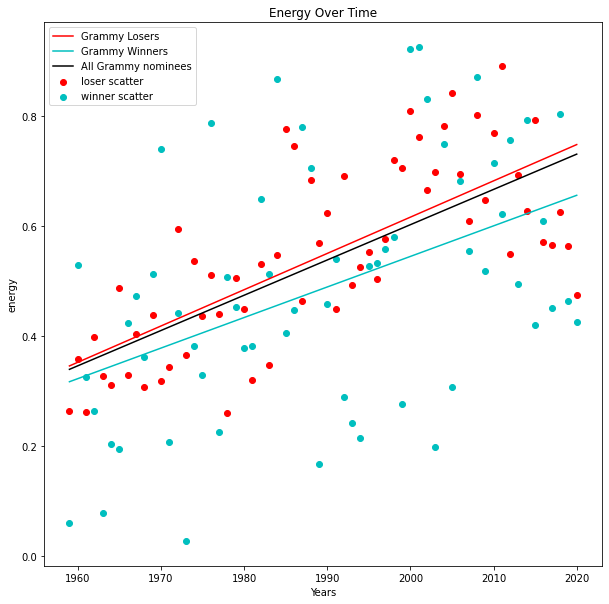

In [ ]:
makePlot(all_grammys, 'energy', 'Energy Over Time')

Next, we plotted the feature ***'danceability.'*** Spotify defines danceability as how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

From the plot above, we can again see an increasing trend for danceability over time. It also shows, that winners of record of the year generally scored less on danceability than the losers. 

Losers: Slope = 0.0038745732560607096  Intercept =  -7.117899552840616
Winners: Slope =  0.0041928432927903605  Intercept =  -7.790048827780615


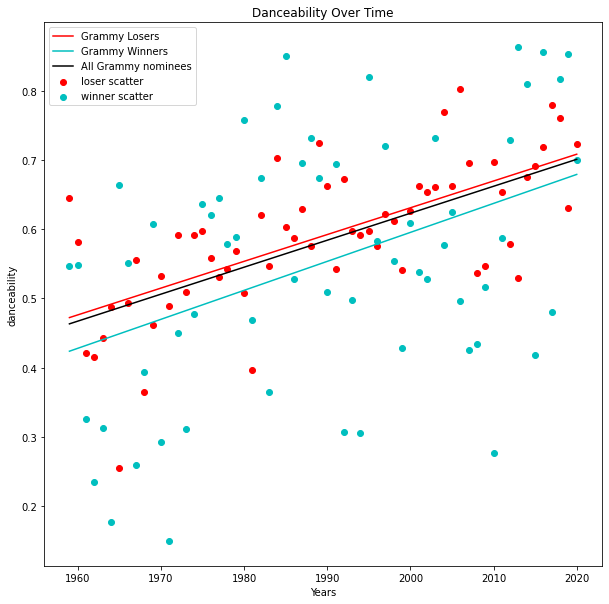

In [ ]:
makePlot(all_grammys, 'danceability', 'Danceability Over Time')

Next, we plotted ***'speechiness.'*** Spotify detects the presence of spoken words in a track to calculate the speechiness value. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

As from the plot above, there is a general increasing trend of speechiness over time, though by the scatterplot and lines of best fit, it is very clear that winners a speechiness values than losers. 

Losers: Slope = 0.0011791489583670499  Intercept =  -2.282537543915485
Winners: Slope =  0.0007056004633476775  Intercept =  -1.3565582508624625


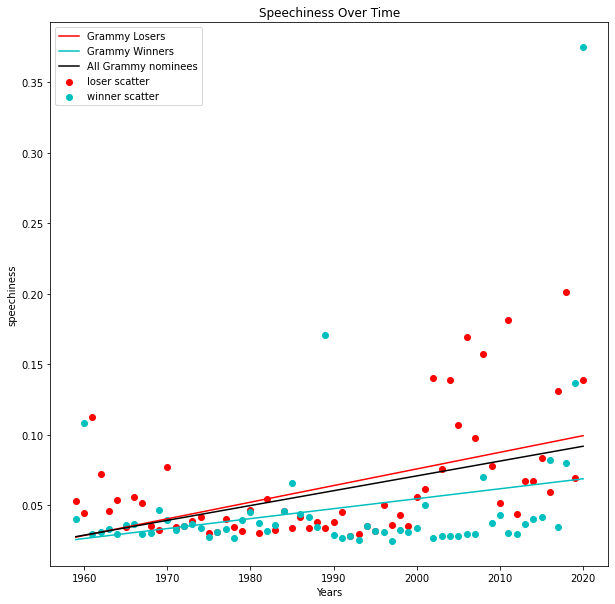

In [ ]:
makePlot(all_grammys, 'speechiness', 'Speechiness Over Time')

Next, we plotted ***'length,'*** which is just the duration of the song in milliseconds. 

In the above plot, we can see that here is a small upward trend in length overall with all nominees of record of the year. However, the lines of best fit show that winners tended to be longer than losers overall. 

In [ ]:
makePlot(all_grammys, 'length', 'Length Over Time')

NameError: ignored

Next, we plotted ***'loudness.'*** Loudness is the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track.

From the above plot, we can see that there is a clear upward trend in loudness of music nominated for record of the year. However, it also seems that in general, winners seem to be slightly less loud than losers.

Losers: Slope = 0.14004533720415638  Intercept =  -287.9285794736599
Winners: Slope =  0.13801853390748123  Intercept =  -284.7976474024823


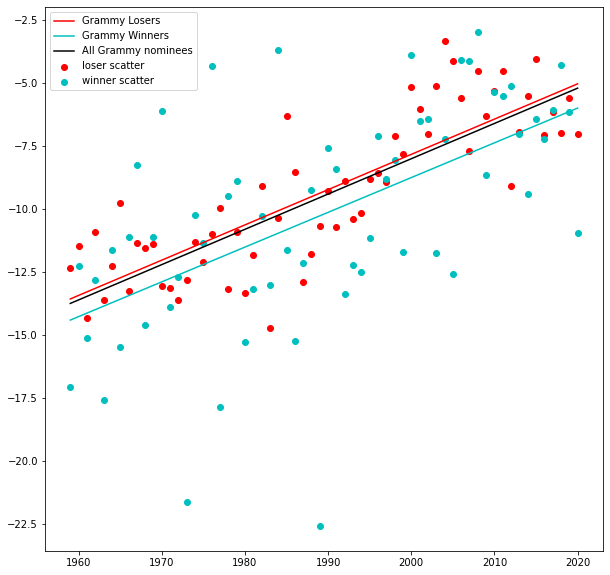

In [ ]:
makePlot(all_grammys, 'loudness', 'Loudness Over Time')

Finally, we measured ***'acousticness.'*** Spotify calculates acousticness as a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

As we can see, music nominated for record of the year has a stark downward trend in acousticness, which makes sense as new electric music has gained ground. However, winners seem to be more acoustic than losers. 

Losers: Slope = -0.01033344904362585  Intercept =  20.90572027828441
Winners: Slope =  -0.009666021001737557  Intercept =  19.683883621666546


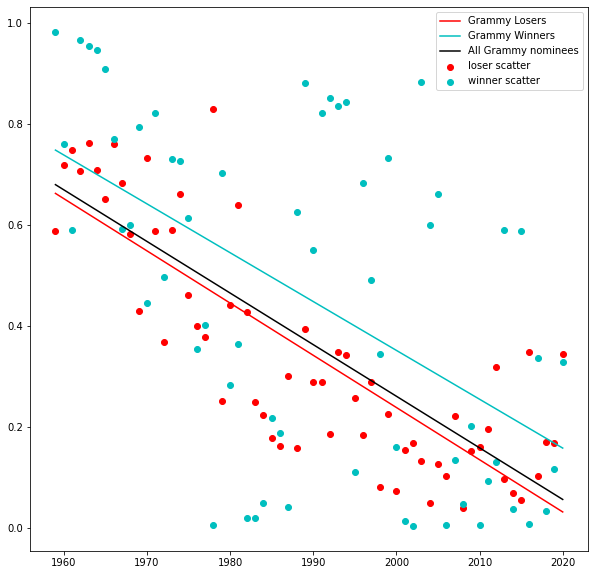

In [ ]:
makePlot(all_grammys, 'acousticness', 'Acousticness Over Time')

In [ ]:
import seaborn as sns

This function creates a set of violin plots to illustrate the distribution of various audio features amongst Winners and Losers

In [ ]:
def make_violin(df, audio_feature, y_label): 
  fig = plt.pyplot.figure(figsize = (7,7))
  ax = fig.add_subplot(111)
  ax = sns.violinplot(x="winner_x", y=audio_feature, palette = "hls", inner = "box" , scale = "width", data=df)
  ax.set_xlabel("Other Nominees = 0, Winner = 1",size = 14,alpha=0.7)
  ax.set_ylabel(y_label,size = 14,alpha=0.7)
  plt.pyplot.title("Distribution of " + y_label + " amongst Winners and Losers" )


In an attempt to avoid redundancy and save space, we chose to plot the trends of 5 audio features in an attempt to illustrate the distributions amongst both  winners and losers. 

We have plotted:


> Energy <Br>
Danceability <br>
Tempo <br>
Length <br>
Accoustiness <br>
Loudness









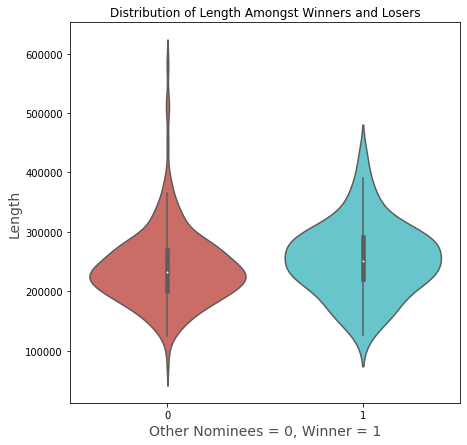

In [ ]:
#Length
make_violin(all_grammys, "length", "Length" )

The violin plot above shows the distribution of ***length*** in winners and losers. Though the distributions are similar, we can see that the peak of the distribution for winners was higher than losers, indicating that winners tended to be longer than losers. 

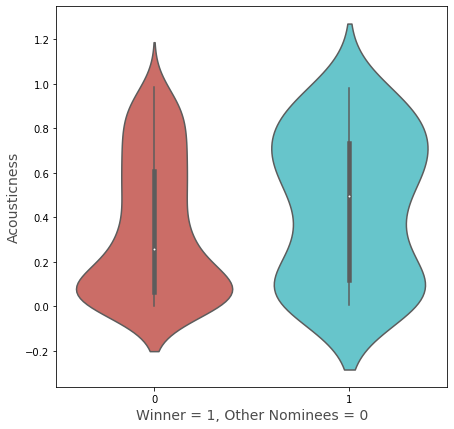

In [ ]:
#Acousticness
make_violin(all_grammys, "acousticness", "Acousticness" )

The above plot shows the distribution of ***acousticness*** in losers and winners. The losers have a unimodal distribution while the winners have a bimodal distribution. We can see that winners had either high or low acousticness scores, but less in the middle. Overall, winners tended to have a higher acousticness score than losers. 

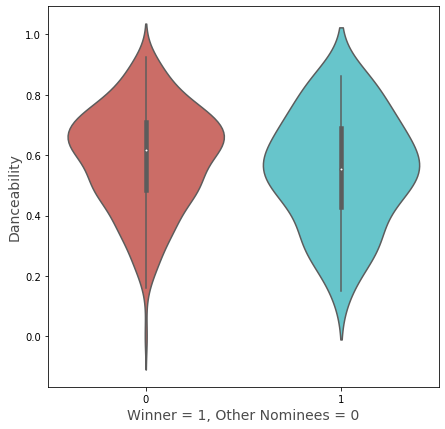

In [ ]:
#Danceability
make_violin(all_grammys, "danceability", "Danceability" )

The above plot shows the distribution of ***danceability*** among winners and losers of grammy record of the year. Though the distributions are both very similar, we can see that winners tend to have a slightly lower danceability score than losers. 

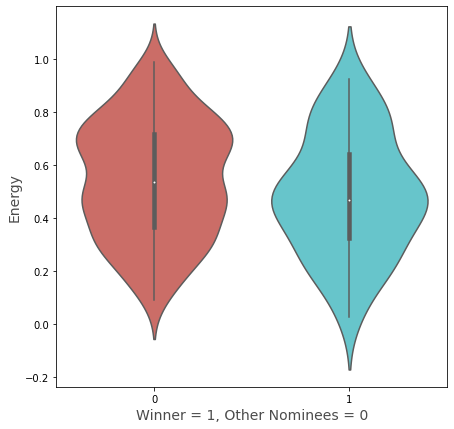

In [ ]:
#Energy
make_violin(all_grammys, "energy", "Energy" )

The above plot shows the distributions for ***energy*** with winners and losers for grammy record of the year. We can see that winners of record of the year tended to be less energetic than the losers. 


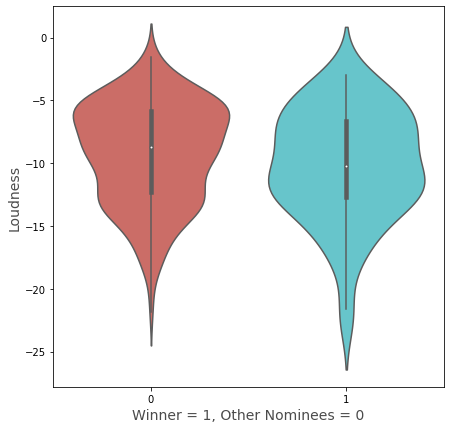

In [ ]:
#Loudness
make_violin(all_grammys, "loudness", "Loudness" )

The above plot shows the distribution of ***loudness*** among winners and losers of grammy record of the year. We can see that the winners of record of the year tended to be less loud than the losers. 

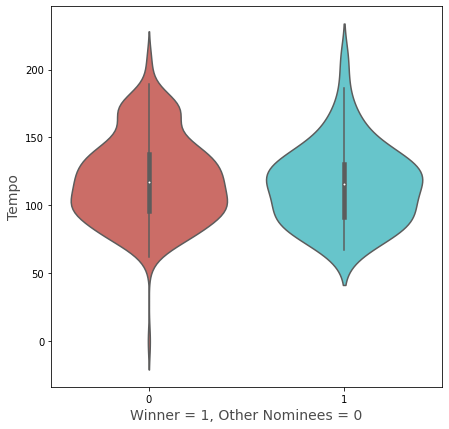

In [ ]:
#Tempo
make_violin(all_grammys, "tempo", "Tempo" )

The above plot shows the distribution of ***tempo*** among winners and losers of grammy record of the year. We can see that the distributions are very similar, though it seems like winners tended to possibly be a little slower than losers, However, as it is difficult to make conclusions for this, tempo would probably not be a useful factor in our models. 

# **Predicting the 2021 Record of the Year!**

We now import data from our 2021 Record of the Year Nominees playlist. Utilizing this playlist and our Spotify API, we can create a dataframe to house each tracks' audio features

In [ ]:
#Get playlist of nominees for 2021
nominees_2021 = getTrackIDs('205ezqssuga60f3pzaur0s03w', '468byHblUQ5ps5rOVPypms')

#Get audio features for nominees for 2021 and create data frame
nominees_21 = []
for i in range(len(nominees_2021)):
    track = getAudioFeatures(nominees_2021[i])
    nominees_21.append(track)

# Create dataframe for 2021 Record of the Year Nominees
roy_2021_nominees = pd.DataFrame(nominees_21, columns= ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 
         'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
        'time_signature', 'trackID'])


#Clean data, extract necessary columns and set nomination year to 2021
roy_2021_nominees['year'] = 2021
roy_2021_nominees = roy_2021_nominees.drop(['release_date', 'trackID'], axis = 1)
roy_2021_nominees = roy_2021_nominees[['name', 'year', 'artist','album', 'length', 'popularity' ,	'acousticness' ,	'danceability', 	'energy', 	'instrumentalness', 	'liveness', 	'loudness','speechiness', 'tempo', 'time_signature']]

roy_2021_nominees.head()


,name,year,artist,album,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,BLACK PARADE,2021,Beyoncé,BLACK PARADE,281272,69,0.00337,0.824,0.555,0.000006,0.2170,-5.817,0.0500,120.002,4
1,Colors,2021,Black Pumas,Black Pumas,246586,60,0.09460,0.391,0.692,0.000016,0.1910,-6.543,0.0462,180.008,4
2,ROCKSTAR (feat. Roddy Ricch),2021,DaBaby,BLAME IT ON BABY,181733,94,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,4
3,Say So,2021,Doja Cat,Hot Pink,237893,87,0.25600,0.787,0.673,0.000004,0.0904,-4.577,0.1580,110.962,4
4,everything i wanted,2021,Billie Eilish,everything i wanted,245425,88,0.90200,0.704,0.225,0.657000,0.1060,-14.454,0.0994,120.006,4


To predict our 2021 Record of the Year winner, we will be utilizing a combination of a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree_learning), [K-Nearest Neighbors Classifier](https://https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) and [Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148) with a Principal Component Analysis ([PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)), to speed up the algorithms.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#Clean up the Test Data
test_data = all_grammys.drop(['trackID','release_date','name_y','artist_y','winner_y'], axis = 1)
test_data = test_data[['name_x', 'year', 'artist_x','album', 'length', 'popularity',  'acousticness' ,	'danceability', 	'energy', 	'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'time_signature', 'winner_x' ]]
test_data.columns = ['name', 'year', 'artist','album', 'length', 'popularity',  'acousticness' ,	'danceability', 	'energy', 	'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'time_signature', 'winner' ]

In [ ]:
#Get data and split into training and testing sets
X = test_data.copy().iloc[:, 4: 15]
y = test_data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Split into training and testing sets

In [ ]:
# Pre-Process the data - Scale the data so each feature has unit variance
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# Fit the PCA
pca = PCA(n_components=0.3)
pca.fit(X_train)

PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

#Decision Tree
dt = DecisionTreeClassifier(max_depth=17, random_state=1)
dt.fit(PCA_X_train, y_train.ravel())
dt_predict = dt.predict(np.c_[X_test_PCA]) #Predict winners

#K-Nearest Neighbor
k_clas = KNeighborsClassifier(n_neighbors=5)
k_clas.fit(PCA_X_train, y_train.ravel())
k_clas_predict = k_clas.predict(np.c_[X_test_PCA]) #Predict winners

#Logistic Regression
log = LogisticRegression()
log.fit(PCA_X_train, y_train.ravel())
log_predict = log.predict(np.c_[X_test_PCA]) #Predict winners


print("Decision Tree Prediction:", dt_predict)
print("K-Nearest Neighbors Prediction: ", k_clas_predict)
print("Logistic Regression Prediction: ", log_predict)


Decision Tree Prediction: [0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0]
K-Nearest Neighbors Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Logistic Regression Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Now to predict the 2021 winner, we will utilize our complete dataset (rather than the train/test sample) and fit the data to our newly created Decision Tree, K-Nearest Neighbors and Logistic Regression models. 

In [ ]:
noms_2021 = roy_2021_nominees.copy().iloc[:,4:15] #Get Features for 2021 Nominess

dt.fit(X, y.values.ravel()) #Fit historical Grammy data to our Decision Tree Model
dt_2021_pred = dt.predict(np.c_[noms_2021]) #Predict 2021 winners

k_clas.fit(X, y.values.ravel()) #Fit historical Grammy data to our K-Nearest Neighbors Model
knn_2021_pred = k_clas.predict(np.c_[noms_2021]) #Predict 2021 winners

log.fit(X, y.values.ravel()) #Fit historical Grammy data to our K-Nearest Neighbors Model
log_2021_pred = log.predict(np.c_[noms_2021]) #Predict 2021 winners

print("Decision Tree 2021 Prediction:       ", dt_2021_pred )
print("K-Nearest Neighbors 2021 Prediction: "  , knn_2021_pred)
print("Logistic Regression 2021 Prediction: "  , log_2021_pred)
print('\n')

print(roy_2021_nominees['name']) #Our winner is Colors by Black Pumas!



Decision Tree 2021 Prediction:        [1 1 1 0 0 0 1 0]
K-Nearest Neighbors 2021 Prediction:  [0 1 0 0 1 0 0 0]
Logistic Regression 2021 Prediction:  [0 0 0 0 0 0 0 0]


0                    BLACK PARADE
1                          Colors
2    ROCKSTAR (feat. Roddy Ricch)
3                          Say So
4             everything i wanted
5                 Don't Start Now
6                         Circles
7    Savage Remix (feat. Beyoncé)
Name: name, dtype: object


And the **Grammy Award for Record of the Year goes to**.....**"Colors" by Black Pumas!** From our analysis, 2/3 of the models have predicted that this track will be the 2021 winner. Unfortunately, our Logistic Regression Model inaccurately predicted that none of the tracks would win; however, the Decision Tree and K-Nearest Neighbors have provided some insight on next year's winner. 

Judging music is quite a subjective task, and there are surely other factors that we didn't account for that contribute to who wins Record of the Year. Other than the quantitative factors we extracted from the Spotify API, factors such as artist popularity, record sales, or general human bias may also contribute to the winner. These unquantifiable features make it difficult to create a perfect prediction model. 

# **Conclusion**

Over the years, though generally considered a universal language, music has evolved due to cultural and technological shifts. Though all Record of the Year winners, notable tracks such as "Moon River" by Henry Mancini, "Beat It," by Michael Jackson, and "24K Magic" by Bruno Mark illustrate the vast musical differences over the past 61 years. 

While it's difficult to judge the quality of music, utilizing the Spotify API's audio features illustrated some evident musical trends over the years. 
 

> **Energy** - Over time, nominees have illustrated an increasing trend in energy. However, winners seemed to have lower energy in comparison to losers. 


> **Danceability** - Over time, nominees have illustrated an increasing trend in "danceability." This trend may be attributed to a rise in genres such as Hip Hop and EDM. Winners of Record of the year have been generally less on danceable than the losers. 


> **Speechiness** - Over time, nominees have illustrated an increasing trend in "speechiness." This trend may be attributed to the rise of Rap music. It is fairly evident that winners tend to be less "speechy" than losers.


> **Length/Duration** - Over time, nominees have illustrated a small upward trend in length. However, the lines of best fit show that winners tended to be longer than losers overall.

> **Loudness** - Over time, nominees have illustrated an upward trend in loudness of music. However, it also seems that in general, winners are slightly less loud than losers.


> **Acousticness** - Over time, nominees have generally illustrated a stark downward trend in "acousticness." However, winners seem to be more acoustic than losers.


Evaluating these musical trends and utilizing a combination of Decision Tree, K-Nearest Neighbors, and Logistic Regression Models, the 2021 Grammy Award for Record of the Year goes to "Colors" by Black Pumas. "Colors" is a soulful, slow-paced R&B hit that fits well within the trends we analyzed. Though our model does not account for features such as artist popularity, cultural shifts, or human bias, it breaks down the Record of the Year nominees purely from a quantitative, musical standpoint.  


